# Proyecto

## Instrucciones

1.- Completa los datos personales (nombre y rol USM) de cada integrante en siguiente celda.


* __Nombre-Rol__:

 * Gabriel Vergara 201510519-7
 * Pablo Muñoz 201423552-6
 * Javier Diaz 201710528-3
 * Gonzalo Gacitúa 201551544-1
 

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Sistemas de recomendación



![rgb](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

### Introducción

El rápido crecimiento de la recopilación de datos ha dado lugar a una nueva era de información. Los datos se están utilizando para crear sistemas más eficientes y aquí es donde entran en juego los sistemas de recomendación. Los sistemas de recomendación son un tipo de sistemas de filtrado de información, ya que mejoran la calidad de los resultados de búsqueda y proporcionan elementos que son más relevantes para el elemento de búsqueda o están relacionados con el historial de búsqueda del usuario.

Se utilizan para predecir la calificación o preferencia que un usuario le daría a un artículo. Casi todas las grandes empresas de tecnología los han aplicado de una forma u otra: Amazon lo usa para sugerir productos a los clientes, YouTube lo usa para decidir qué video reproducir a continuación en reproducción automática y Facebook lo usa para recomendar páginas que me gusten y personas a seguir. Además, empresas como Netflix y Spotify dependen en gran medida de la efectividad de sus motores de recomendación para sus negocios y éxitos.

### Objetivos

Poder realizar un proyecto de principio a fin ocupando todos los conocimientos aprendidos en clase.  Para ello deben cumplir con los siguientes objetivos:

* **Desarrollo del problema**: Se les pide a partir de los datos, proponer al menos un tipo de sistemas de recomendación. Como todo buen proyecto de Machine Learning deben seguir el siguiente procedimiento:
 * **Lectura de los datos**: Describir el o los conjunto de datos en estudio.
 * **Procesamiento de los datos**: Procesar adecuadamente los datos en estudio. Para este caso ocuparan técnicas de [NLP](https://en.wikipedia.org/wiki/Natural_language_processing).
 * **Metodología**: Describir adecuadamente el procedimiento ocupado en cada uno de los modelos ocupados.
 * **Resultados**: Evaluar adecuadamente cada una de las métricas propuesta en este tipo de problemas.
 
 
* **Presentación**: La presentación será levemente distinta a las anteriores, puesto que deberán ocupar la herramienta de Jupyter llamada [RISE](https://en.wikipedia.org/wiki/Natural_language_processing). Esta presentación debe durar aproximadamente entre 15-30 minutos, y deberán mandar sus videos (por youtube, google drive, etc.)

### Evaluación

* **Códigos**: Los códigos deben estar correctamente documentados (ocupando las *buenas prácticas* de python aprendidas en este curso).
* **Explicación**: La explicación de la metodología empleada debe ser clara, precisa y concisa.
* **Apoyo Visual**: Se espera que tengan la mayor cantidad de gráficos y/o tablas que puedan resumir adecuadamente todo el proceso realizado.



 


### Esquema del proyecto

El proyecto tendrá la siguiente estructura de trabajo:

```
- project
|
|- data
    |- tmdb_5000_credits.csv
    |- tmdb_5000_movies.csv
|- graficos.py
|- lectura.py
|- modelos.py
|- preprocesamiento.py
|- presentacion.ipynb
|- project.ipynb

```

donde:

* `data`: carpeta con los datos del proyecto
* `graficos.py`: módulo de gráficos 
* `lectura.py`: módulo de lectura de datos
* `modelos.py`: módulo de modelos de Machine Learning utilizados
* `preprocesamiento.py`: módulo de preprocesamiento de datos
* `presentacion.ipynb`: presentación del proyecto (formato *RISE*)
* `project.ipynb`: descripción del proyecto

### Apoyo

Para que la carga del proyecto sea lo más amena posible, se les deja las siguientes referencias:

* **Sistema de recomendación**: Pueden tomar como referencia el proyecto de Kaggle [Getting Started with a Movie Recommendation System](https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system/data?select=tmdb_5000_credits.csv). 
*  **RISE**: Les dejo un video del Profesor Sebastían Flores denomindo *Presentaciones y encuestas interactivas en jupyter notebooks y RISE* ([link](https://www.youtube.com/watch?v=ekyN9DDswBE&ab_channel=PyConColombia)). Este material les puede ayudar para comprender mejor este nuevo concepto.

## **LEER DATOS**

In [1]:
#Leer datos

# print("Mounting your Google Drive ...")

# from google.colab import drive
# drive.flush_and_unmount()
# drive.mount('/content/drive',force_remount=True)
 
name1 = 'tmdb_5000_credits.csv' 
name2 = 'tmdb_5000_movies.csv' 

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import os 

# path = "/content/drive/My Drive/clases-II-2020/MAT281/Project/data/"

df1 = pd.read_csv(os.path.join("data",name1),encoding='latin-1')
df1 = df1.dropna()

df2 = pd.read_csv(os.path.join("data",name2),encoding='latin-1')
df2 = df2.dropna()

In [3]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

In [4]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bondâs past sends him...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
C= df2['vote_average'].mean()
print(C)
m= df2['vote_count'].quantile(0.9)
print(m)

6.272873409243134
3615.7999999999984


In [6]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(150, 23)

In [7]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    #Utilizando la fórmula de IMBD se calcula el score
    return (v/(v+m) * R) + (m/(m+v) * C)

In [8]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [9]:
#Se ordenan las películas en base al score calculado
q_movies = q_movies.sort_values('score', ascending=False)

#Se imprime el top 10 de películas basados en el score
q_movies[['title', 'vote_count', 'vote_average', 'score']].reset_index(drop=True).head(10)

,title,vote_count,vote_average,score
0,The Dark Knight,12002,8.2,7.753836
1,Fight Club,9413,8.3,7.737424
2,Inception,13752,8.1,7.719611
3,Interstellar,10867,8.1,7.643837
4,The Godfather,5893,8.4,7.591142
5,The Lord of the Rings: The Return of the King,8064,8.1,7.534363
6,The Lord of the Rings: The Fellowship of the Ring,8705,8.0,7.493138
7,The Empire Strikes Back,5879,8.2,7.466114
8,Guardians of the Galaxy,9742,7.9,7.459556
9,Star Wars,6624,8.1,7.454819


# **GRÁFICO**

Text(0.5, 1.0, 'Popular Movies')

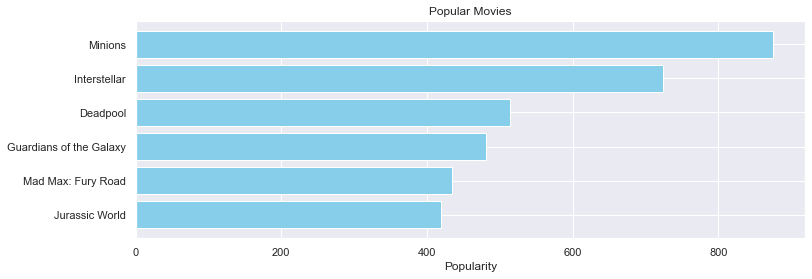

In [10]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [11]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bondâs past sends him...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

# **PRE PROCESAMIENTO**

In [12]:
#Se importa la librería para el preprocesamiento
from sklearn.feature_extraction.text import TfidfVectorizer

#Con el vectorizador, se eliminan las palabras pequeñas, como "a", "the" o pronombres para el modelo
tfidf = TfidfVectorizer(stop_words='english')

#Se quitan los NaN por espacios vacíos
df2['overview'] = df2['overview'].fillna('')

#Hacemos la matriz de datos ya vectorizados para fittear el modelo
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Veamos el tamaño de la matriz
tfidf_matrix.shape

(1493, 11298)

# **MODELO**

In [13]:
# Usaremos una SVM con kernel lineal
from sklearn.metrics.pairwise import linear_kernel

# veamos la matriz de similaridad
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [14]:
#Hagamos una matriz con los índices de las películas y luego con el título
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [15]:
#La función para recomendar películas
def get_recommendations(title, cosine_sim=cosine_sim):
    # Se obtiene el índice de la película que va con el respectivo título de la serie creada anteriormente
    idx = indices[title]

    # Se crea la matriz de similaridad de pares para cada película, con esa película en particular, similar a un One vs All
    sim_scores = list(enumerate(cosine_sim[idx]))

    #Se ordena la matriz en base a los scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Se obtienen en base dichos puntajes las 10 películas que más se parecen, se pone del 1 al 11, porque el 0 es trivialmente la mísma película
    sim_scores = sim_scores[1:11]

    # De estas 10 películas, se obtienen sus respectivos índices
    movie_indices = [i[0] for i in sim_scores]

    # Finalmente se retornan las 10 películas más parecidas a la pedida
    return df2['title'].iloc[movie_indices].reset_index(drop=True)

In [16]:
# Se pasan los features que está como string a sus respectivos objetos
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [17]:

# Obtener el nombre del director desde el feature "crew". De no tener al director de la película listado, se retorna un NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [18]:
 #Retorna la lista con los 3 top elementos, o la lista entera si es que son menos de 3.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        #Se checkea si es que hay más de 3 elementos. En caso positivo, sólo retorna 3, sino, retorna la lista completa
        if len(names) > 3:
            names = names[:3]
        return names

    #Retorna una lista vacía en caso de un error
    return []

In [19]:
# Se define un nuevo director, cast género, palabras clave que estén en una forma adecuada
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [20]:
# Imprimir los features de las 3 primeras películas
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [21]:
#Función que convierte todos los string a minúsculas y les quita los espacios por comas
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Se checkea si el director existe. Sino, retorna un string vacío.
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [22]:
#Aplica la función clean_data a los atributos.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [23]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [24]:
# Importa CountVectorizer y crea una matriz de contadores
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [25]:
# Calcula la matríz de Similaridad Cosenoidal basada en count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [26]:
# Actualiza el índice del DataFrame principal y construye un mapeo en reversa tal como se mostró anteriormente
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

# **RESULTADOS**

In [27]:
get_recommendations('The Dark Knight Rises', cosine_sim2)


0           The Dark Knight
1             Batman Begins
2              The Prestige
3                    Takers
4                    Faster
5            Gangster Squad
6      The Killer Inside Me
7                   Bronson
8             Suicide Squad
9    Exodus: Gods and Kings
Name: title, dtype: object

In [28]:
get_recommendations('The Godfather', cosine_sim2)

0            The Godfather: Part III
1                     Apocalypse Now
2            The Talented Mr. Ripley
3    Wall Street: Money Never Sleeps
4                         Compliance
5                             Takers
6                        August Rush
7                             Faster
8         Things We Lost in the Fire
9                  American Gangster
Name: title, dtype: object